## Analyzing Canadian Tomato Prices Over 8 Years from 2013 - 2021

In [ ]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import seaborn as sns
import datetime

In [2]:
df = pd.read_csv('Tomato.csv')

df.head()

#Date: Cost data from respective dates ranging from 2013-2021
#Unit: The costs based on the unit of weight for tomatos, kilograms
#Minimum: The minimum recorded sale price for a kg for tomatoes each day
#Maximum: The maximum recorded sale price for a kg of tomatoes each day
#Average: Average sale price of tomato recorded each day
#Market: Tomato (the product for which prices are being tracked)

,Date,Unit,Minimum,Maximum,Average,Market
0,2013-06-16,Kg,26,32,29.0,Tomato
1,2013-06-17,Kg,20,25,22.5,Tomato
2,2013-06-18,Kg,22,26,24.0,Tomato
3,2013-06-19,Kg,24,28,26.0,Tomato
4,2013-06-20,Kg,22,26,24.0,Tomato


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2741 entries, 0 to 2740
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2741 non-null   object 
 1   Unit     2741 non-null   object 
 2   Minimum  2741 non-null   int64  
 3   Maximum  2741 non-null   int64  
 4   Average  2741 non-null   float64
 5   Market   2741 non-null   object 
dtypes: float64(1), int64(2), object(3)
memory usage: 128.6+ KB


In [4]:
df.isnull().sum()

Date       0
Unit       0
Minimum    0
Maximum    0
Average    0
Market     0
dtype: int64

In [5]:
# Add new columns that indicates what season a month is and if the time is before or during pandemic
# make a new column and assign values based on -> (1- spring, 2-summer, 3-fall, 4-winter)
def getSeasonFromMonth(x):
  x = x.month
  if x in [12, 1, 2]:
    return '4'
  elif x in [3, 4, 5]:
    return '1'
  elif x in [6, 7, 8]:
    return '2'
  else:
    return '3'

new_column = pd.to_datetime(df['Date'], format='%Y-%m-%d')
df['year'] = pd.DatetimeIndex(df['Date']).year
df['season'] = new_column.apply(lambda x: getSeasonFromMonth(x))
df

# (0-non-pandemic, 1-pandemic)
df['pandemic'] = None
df.loc[df['Date'] < '2020-03-21', 'pandemic'] = '0'
df.loc[df['Date'] >= '2020-03-21', 'pandemic'] = '1'
df

# drop Market
df = df.drop('Market', axis=1)
df

,Date,Unit,Minimum,Maximum,Average,year,season,pandemic
0,2013-06-16,Kg,26,32,29.0,2013,2,0
1,2013-06-17,Kg,20,25,22.5,2013,2,0
2,2013-06-18,Kg,22,26,24.0,2013,2,0
3,2013-06-19,Kg,24,28,26.0,2013,2,0
4,2013-06-20,Kg,22,26,24.0,2013,2,0
...,...,...,...,...,...,...,...,...
2736,2021-05-09,Kg,10,15,12.5,2021,1,1
2737,2021-05-10,Kg,10,15,12.5,2021,1,1
2738,2021-05-11,Kg,10,15,12.5,2021,1,1
2739,2021-05-12,Kg,30,35,32.5,2021,1,1


In [6]:
#Hypothesis Test for determining if average tomato prices are different significantly
from scipy.stats import f_oneway

seasonal_data = df.groupby('season')['Average'].mean()
print (seasonal_data)

#Creating dataframe for rows that correlate w spring months, then storing 'Average' values of those rows in array
spring_df = df[df['season'] == '1']
springArr = spring_df['Average'].values

#Creating dataframe for rows that correlate w summer months, then storing 'Average' values of those rows in array
summer_df = df[df['season'] == '2']
summerArr = summer_df['Average'].values

#Creating dataframe for rows that correlate w fall months, then storing 'Average' values of those rows in array
fall_df = df[df['season'] == '3']
fallArr = fall_df['Average'].values

#Creating dataframe for rows that correlate w winter months, then storing 'Average' values of those rows in array
winter_df = df[df['season'] == '4']
winterArr = winter_df['Average'].values

f_value, p_value = f_oneway(springArr,summerArr,fallArr,winterArr)

print("F-value:", f_value)
print("p-value:", p_value)

if p_value < 0.05:
    print("Reject H0, the means of tomato prices across different seasons are significantly different.")
else:
    print("Fail to reject H0, there is no significant difference between means of tomato prices across different seasons.")



season
1    37.163650
2    40.856628
3    46.200286
4    28.289781
Name: Average, dtype: float64
F-value: 159.8026238351687
p-value: 1.9118485801569532e-95
Reject H0, the means of tomato prices across different seasons are significantly different.


In [7]:
df_plot = df.copy()
seasons = {'1': 'Spring', '2': 'Summer', '3': 'Fall', '4': 'Winter'}
pandemic = {'0': 'Pre-pandemic', '1' : 'Post-Pandemic'}
df_plot['season'] = df_plot['season'].apply(lambda x: seasons[x])
df_plot['pandemic'] = df_plot['pandemic'].apply(lambda x: pandemic[x])

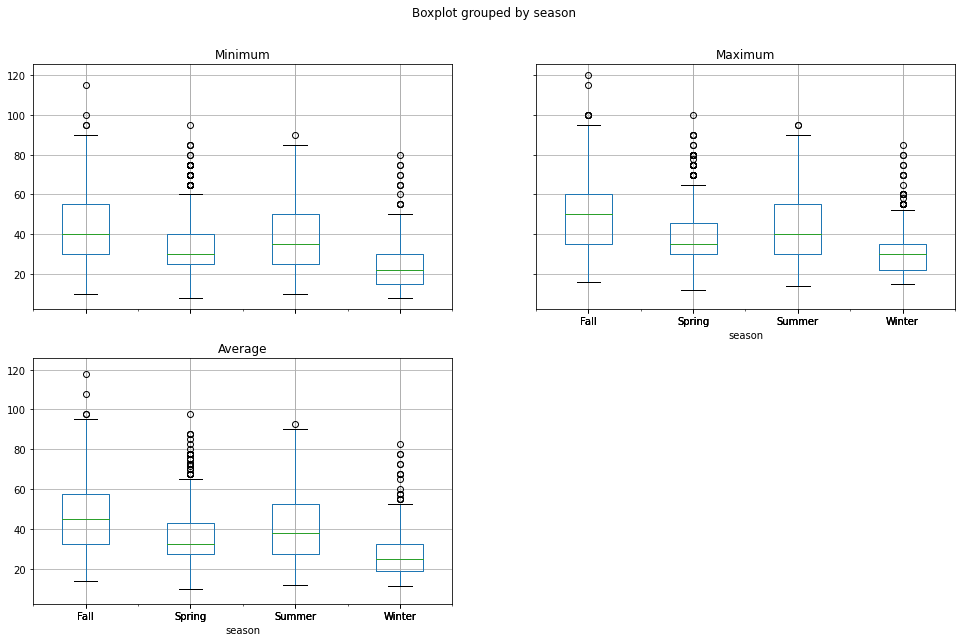

In [8]:
# season box plot
df_plot.boxplot(['Minimum', 'Maximum', 'Average'], by='season', figsize=(16,10));

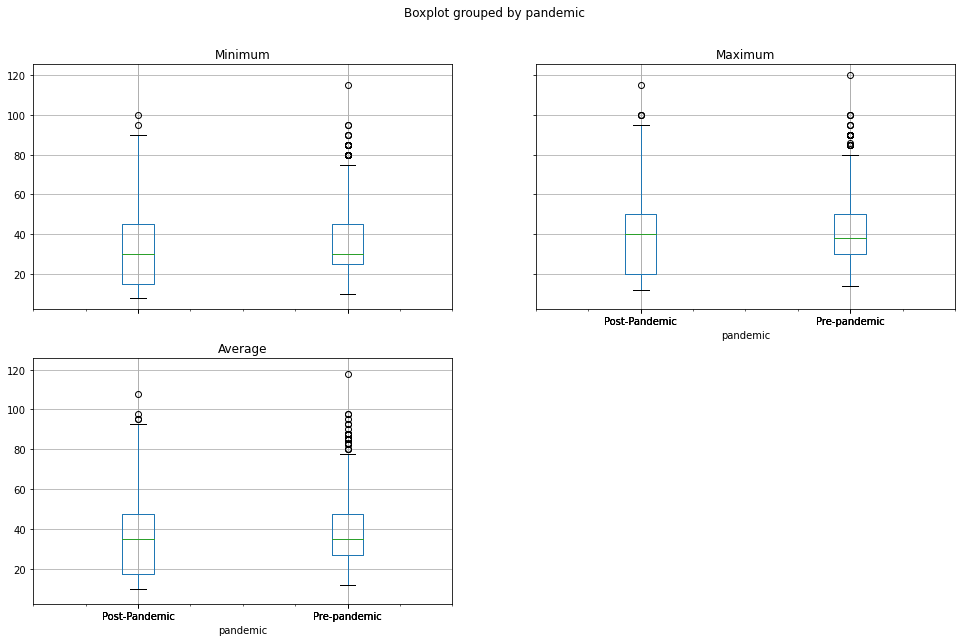

In [9]:
# Pandemic box plot
df_plot.boxplot(['Minimum', 'Maximum', 'Average'], by='pandemic', figsize=(16,10));

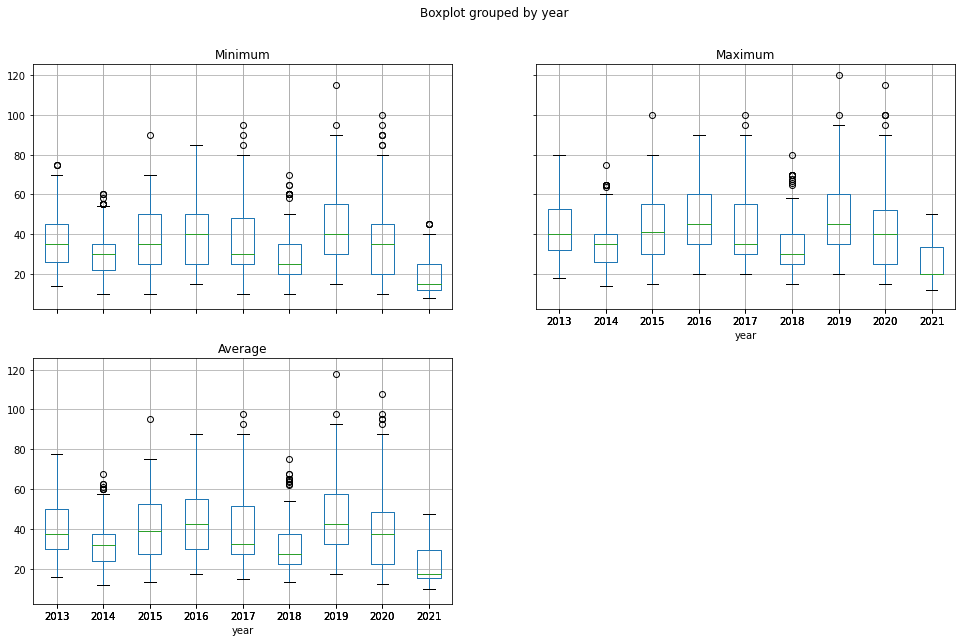

In [10]:
# year boxplot
df_plot.boxplot(['Minimum', 'Maximum', 'Average'], by='year', figsize=(16,10));

In [11]:

from scipy import stats
filtered_df = df[['pandemic', 'Average']]

#  Create two separate DataFrames for the pandemic and non-pandemic groups
pandemic = filtered_df[filtered_df['pandemic'] == 1]
non_pandemic = filtered_df[filtered_df['pandemic'] == 0]

# Perform the two-sample t-test
t_stat, p_value = stats.ttest_ind(pandemic['Average'], non_pandemic['Average'])

# Set significance level
alpha = 0.05  

if p_value < alpha:
    print("Reject the null hypothesis: there is a significant difference in price between the two groups.")
else:
    print("Fail to reject the null hypothesis: there is no significant difference in price between the two groups.")

Fail to reject the null hypothesis: there is no significant difference in price between the two groups.


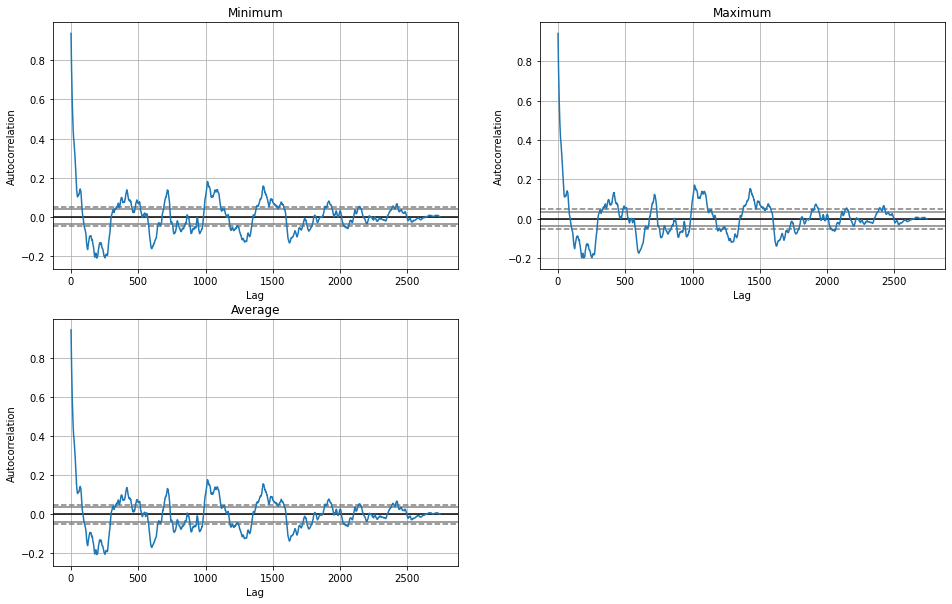

In [12]:
fig, axs = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(10)
fig.set_figwidth(16)
pd.plotting.autocorrelation_plot(df_plot['Minimum'], ax = axs[0,0]);
pd.plotting.autocorrelation_plot(df_plot['Maximum'], ax = axs[0,1]);
pd.plotting.autocorrelation_plot(df_plot['Average'], ax = axs[1,0]);
axs[0,0].title.set_text('Minimum')
axs[0,1].title.set_text('Maximum')
axs[1,0].title.set_text('Average')
plt.title('Autocorrelation plots for prices of tomatoes')
fig.delaxes(axs[1,1])